In [57]:
# Importar librerias
import pandas as pd #manejo y análisis de datos
import numpy as np # cálculo numerico y el análisis de datos
import seaborn as sns #creción de graficos estadísticos
import matplotlib.pyplot as plt # librerias graficas

from sklearn.preprocessing import StandardScaler # estandarizar datos
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [13]:
#cargarmos dataset
#Lectura de datos Python y se carga en la variable datos
df = pd.read_csv("C:/Users/PERSONAL/Documents/Mall_Customers.csv") #Lectura de datos en Phyton y se carga en variable df


In [18]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [20]:
df.shape

(200, 5)

In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [100]:
df.isna().sum() #valores nulos

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [102]:
df.dropna()# esto sirve paraeliminar en este caso no hay pero se deja

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


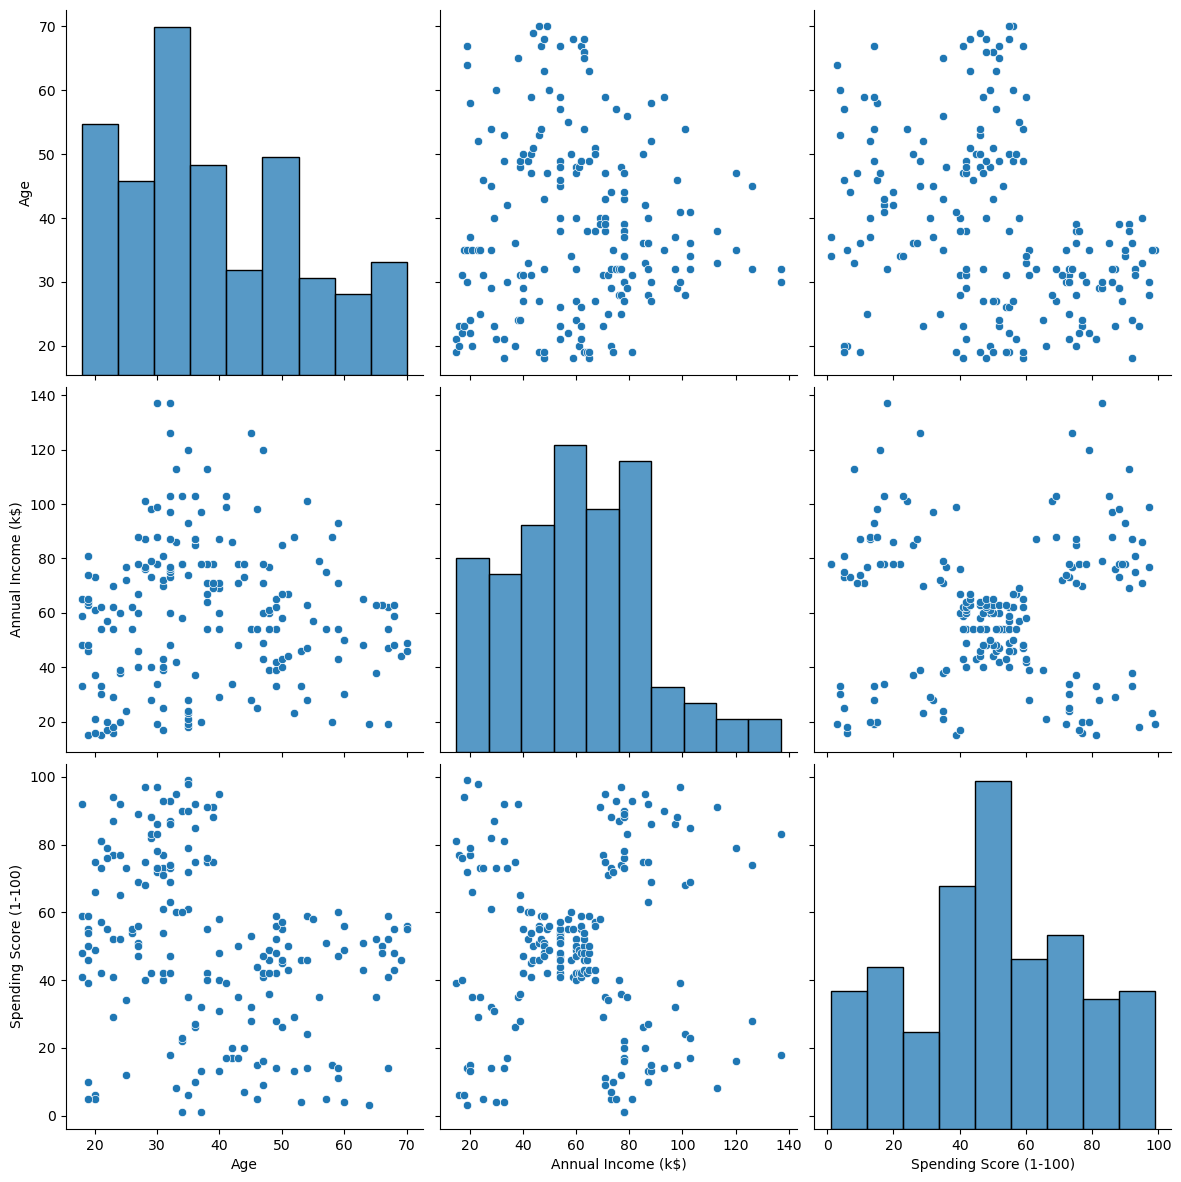

In [104]:
sns.pairplot(df.dropna(), size=4, kind='scatter')# diagrama de dispersion

In [112]:
corr_matrix=df.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

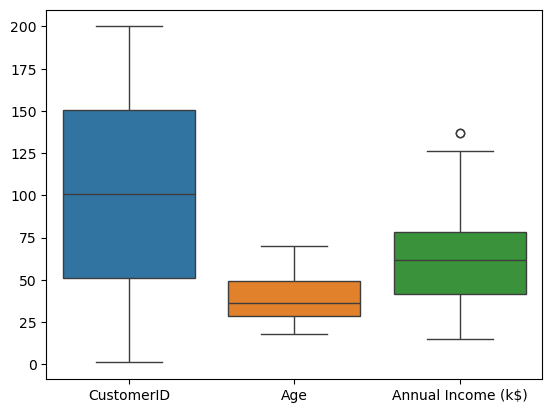

In [108]:
sns.boxplot(data=data)# diagrama de caja para cada variable

In [110]:
#estandarizar los datos antes de aplica
scaler= StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

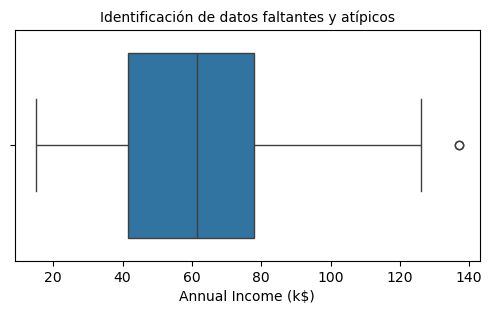

In [28]:
#Identificación de datos faltantes y atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [31]:
#Revisión de datos faltantes
print("cantidad de registros con cero en edad: ", df['Age'].isin([0]).sum())
print("cantidad de registros con cero en salario: ",df['Annual Income (k$)'].isin([0]).sum())
print("cantidad de registros con cero en data credito: ",df['Spending Score (1-100)'].isin([0]).sum())

cantidad de registros con cero en edad:  0
cantidad de registros con cero en salario:  0
cantidad de registros con cero en data credito:  0


In [33]:
#reemplazar todos los ceros con el valor medio (promedio) de la columna
df['Annual Income (k$)']=df['Annual Income (k$)'].replace(0,df['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'identificación de datos atípicos')

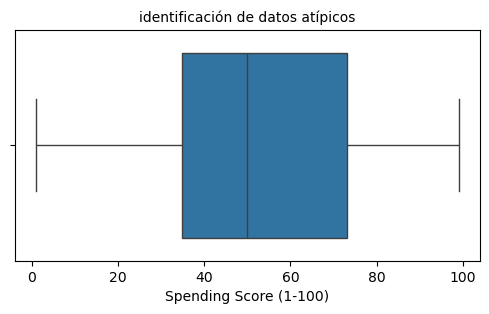

In [35]:
#identificación de datos atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('identificación de datos atípicos', fontsize=10)

In [37]:
#conteo de datos atípicos
nivel_minimo=0
nivel_maximo=100
Total_atípicos=((df['Spending Score (1-100)']<nivel_minimo)| (df['Spending Score (1-100)']>nivel_maximo)).sum()
print ("el total de datos atípicos es {}".format(Total_atípicos))

el total de datos atípicos es 0


In [39]:
#filtrar datos atipicos
df=df[(df['Spending Score (1-100)']<nivel_maximo)&(df['Spending Score (1-100)']>nivel_minimo)]

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [41]:
#revision del tipo de datos y datos faltantes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
#filtra columnas del modelo
df=df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [48]:
#revisión de los datos de las variables objetivo
df.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


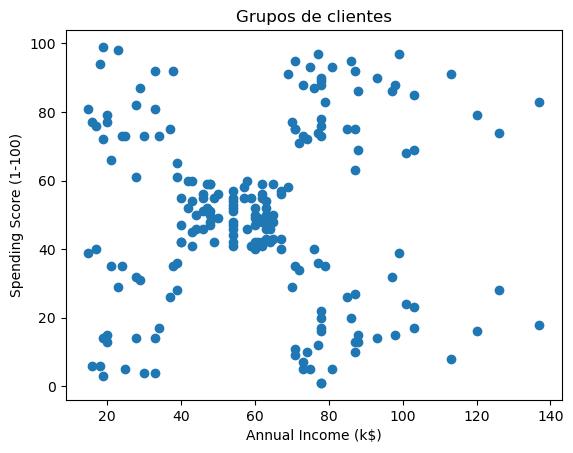

In [50]:
#grafica antes del agrupamiento
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')
plt.show()

4. Entrenar el modelo configurando los diferentes hiperparámetros

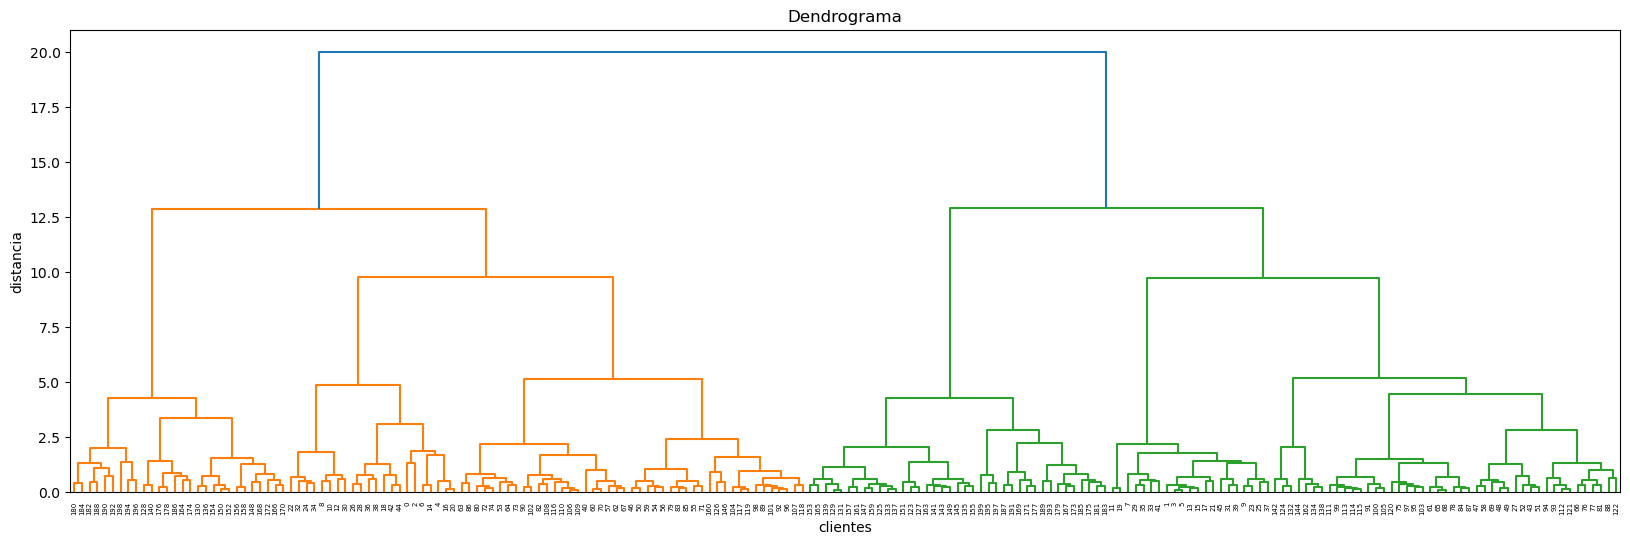

In [116]:
ward_clustering = linkage(X, method="ward", metric="euclidean")

plt.figure(figsize= (20,6))
dendrogram(ward_clustering)

plt.title('Dendrograma')
plt.xlabel('clientes')
plt.ylabel('distancia')
plt.show()


In [120]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [143]:
#calcular meddas de calidad para clustering jerarquico
print ("\nMedidas de calidad para Clustering jerárquico:")
print ("Puntaje de silueta;", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz: ", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies- Bouldin Index :", metrics.davies_bouldin_score(X, labels_hier))



Medidas de calidad para Clustering jerárquico:
Puntaje de silueta; 0.31795733680759597
Indice de Calinski-Harabasz:  99.00066801676013
Davies- Bouldin Index : 1.3082962894168522


In [139]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier= hier_clustering.fit_predict(X)
labels_hier

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

5. Evaluar el desempeño del modelo con métricas como Coeficiente
de Silhouette, Índice de Calinski-Harabasz, etc

In [141]:
#calcular meddas de calidad para clustering jerarquico
print ("\nMedidas de calidad para Clustering jerárquico:")
print ("Puntaje de silueta;", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz: ", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies- Bouldin Index :", metrics.davies_bouldin_score(X, labels_hier))



Medidas de calidad para Clustering jerárquico:
Puntaje de silueta; 0.31795733680759597
Indice de Calinski-Harabasz:  99.00066801676013
Davies- Bouldin Index : 1.3082962894168522


6. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo

In [122]:
#OBTENEMOS LAS ETIQUETAS DE CADA PUNTO DE LOS DATOS
labels= labels_hier
colores=['red', 'green', 'cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

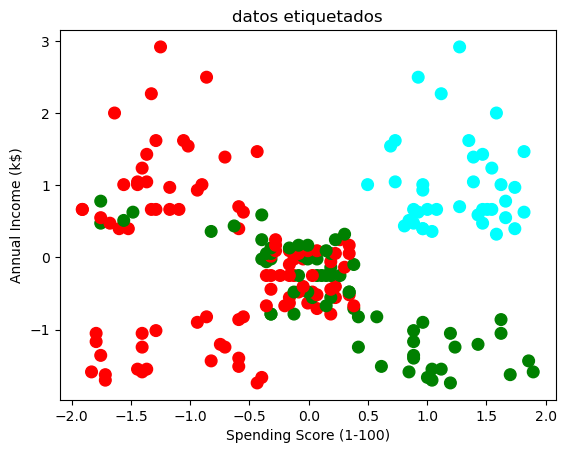

In [126]:
f1= X ['Spending Score (1-100)'].values
f2= X ['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

7. Interpretar, analizar y documentar los resultados obtenidos.

#-Coeficiente de Silueta (Silhouette Score): Evalúa qué tan similar es un punto a su propio grupo en comparación con otros grupos.

Un valor de 0.3179 indica una separación moderada entre los clusters. Hay cierta estructura en los datos, pero no es completamente clara. Es aceptable para un problema sin etiqueta y sugiere que los grupos existen, pero podrían optimizarse.

-Índice de Calinski-Harabasz: Compara la dispersión entre los clusters con la dispersión dentro de cada cluster.

Un valor de 99.00 es relativamente bueno, lo que indica que los clusters son compactos internamente y están bien separados entre sí. Apoya el resultado del coeficiente de silueta.

-Índice de Davies-Bouldin: Promedio de las similitudes entre cada cluster y el más parecido a él.

Un valor de 1.308 es aceptable. Generalmente, valores < 1 son buenos, y valores entre 1 y 2 indican separación moderada. Esto confirma que los clusters son razonablemente distintos, aunque podrían mejorarse.

Conclusión: El modelo de clustering jerárquico es moderadamente bueno:Hay una separación razonable entre los grupos (Silhouette ≈ 0.32).Los clusters están bastante bien definidos (Calinski-Harabasz ≈ 99).
No hay una gran superposición entre los clusters (Davies-Bouldin ≈ 1.3).